In [2]:
from langchain_community.tools import ArxivQueryRun,WikipediaQueryRun

In [3]:
from langchain_community.utilities import WikipediaAPIWrapper,ArxivAPIWrapper

In [12]:
api_wrapper_arxiv=ArxivAPIWrapper(top_k_results=2,doc_content_chars_max=500)
arxiv=ArxivQueryRun(api_wrapper=api_wrapper_arxiv)
print(arxiv.name)

arxiv


In [13]:
arxiv.invoke("what is machine learning")

'Published: 2023-06-07\nTitle: Changing Data Sources in the Age of Machine Learning for Official Statistics\nAuthors: Cedric De Boom, Michael Reusens\nSummary: Data science has become increasingly essential for the production of official statistics, as it enables the automated collection, processing, and analysis of large amounts of data. With such data science practices in place, it enables more timely, more insightful and more flexible reporting. However, the quality and integrity of data-science-'

In [9]:
api_wrapper_arxiv=WikipediaAPIWrapper(top_k_results=2,doc_content_chars_max=500)
wiki=WikipediaQueryRun(api_wrapper=api_wrapper_arxiv)
print(wiki.name)

wikipedia


In [11]:
wiki.invoke("what is machine learning")

'Page: Machine learning\nSummary: Machine learning (ML) is a field of study in artificial intelligence concerned with the development and study of statistical algorithms that can learn from data and generalize to unseen data, and thus perform tasks without explicit instructions. Within a subdiscipline in machine learning, advances in the field of deep learning have allowed neural networks, a class of statistical algorithms, to surpass many previous machine learning approaches in performance.\nML fi'

In [14]:
from dotenv import load_dotenv
load_dotenv()

import os
os.environ["OPENAI_API_KEY"]=os.getenv("OPENAI_API_KEY")
os.environ["GROQ_API_KEY"]=os.getenv("GROQ_API_KEY")
os.environ["TAVILY_API_KEY"]=os.getenv("TAVILY_API_KEY")

In [16]:
from langchain_community.tools.tavily_search import TavilySearchResults
tavily=TavilySearchResults()

C:\Users\kumar\AppData\Local\Temp\ipykernel_23468\3543858584.py:2: LangChainDeprecationWarning: The class `TavilySearchResults` was deprecated in LangChain 0.3.25 and will be removed in 1.0. An updated version of the class exists in the `langchain-tavily package and should be used instead. To use it run `pip install -U `langchain-tavily` and import as `from `langchain_tavily import TavilySearch``.
  tavily=TavilySearchResults()


In [17]:
tavily.invoke("who's prime is better jon jones or stipe miocic?")

[{'title': 'Prime Stipe vs Prime Jones : r/ufc - Reddit',
  'url': 'https://www.reddit.com/r/ufc/comments/15um7t5/prime_stipe_vs_prime_jones/',
  'content': 'Go to ufc   \n\nr/ufc   • \n\nCuriousWanderer567\n\n# Prime Stipe vs Prime Jones\n\nThey’re gonna fight already but Stipe is almost 41 (his birthday is tomorrow) and it’s kinda obvious Jon Jones will beat him being way younger. Who would win in both of their respective primes though?\n\n          \n\n## Top Posts\n\n Reddit\n\n  reReddit: Top posts of August 18, 2023\n\n Reddit\n\n  reReddit: Top posts of August 2023\n\n Reddit\n\n  reReddit: Top posts of 2023\n\nReddit Rules    Privacy Policy    User Agreement    Your Privacy Choices    Accessibility   Reddit, Inc. © 2026. All rights reserved.',
  'score': 0.83290404},
 {'title': 'UFC 309: Jones vs. Miocic',
  'url': 'http://ufcstats.com/fight-details/b35e47f2f58ef026',
  'content': '## UFC 309: Jones vs. Miocic\n\nW \n\n### Jon Jones\n\nL \n\n### Stipe Miocic\n\nUFC Heavyweight 

In [18]:
tools=[arxiv,wiki,tavily]

In [20]:
from langchain_groq.chat_models import ChatGroq

In [21]:
llm=ChatGroq(model="llama-3.1-8b-instant",temperature=0)

In [23]:
llm_with_tools=llm.bind_tools(tools)

In [24]:
from pprint import pprint
from langchain_core.messages import HumanMessage,AIMessage,SystemMessage

In [26]:
llm_with_tools.invoke([HumanMessage(content=f"current best ai technology for freshers")])

AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'mtc2kdqw5', 'function': {'arguments': '{"query":"current best AI technology for freshers"}', 'name': 'wikipedia'}, 'type': 'function'}]}, response_metadata={'token_usage': {'completion_tokens': 20, 'prompt_tokens': 554, 'total_tokens': 574, 'completion_time': 0.033117143, 'completion_tokens_details': None, 'prompt_time': 0.039310809, 'prompt_tokens_details': None, 'queue_time': 0.048968714, 'total_time': 0.072427952}, 'model_name': 'llama-3.1-8b-instant', 'system_fingerprint': 'fp_f757f4b0bf', 'service_tier': 'on_demand', 'finish_reason': 'tool_calls', 'logprobs': None, 'model_provider': 'groq'}, id='lc_run--019c7077-6be9-7322-a520-c5a76d6acab0-0', tool_calls=[{'name': 'wikipedia', 'args': {'query': 'current best AI technology for freshers'}, 'id': 'mtc2kdqw5', 'type': 'tool_call'}], invalid_tool_calls=[], usage_metadata={'input_tokens': 554, 'output_tokens': 20, 'total_tokens': 574})

In [27]:
from IPython.display import Image
from langgraph.graph import StateGraph,START,END

In [28]:
from langgraph.prebuilt import ToolNode,tools_condition

In [35]:
from typing_extensions import TypedDict
from langchain_core.messages import AnyMessage
from typing import Annotated
from langgraph.graph.message import add_messages
class state(TypedDict):
    messages:Annotated[list[AnyMessage],add_messages]

In [39]:
def tool_calling_llm(state:state):
    return {"messages":[llm_with_tools.invoke(state["messages"])]}

builder=StateGraph(state)
builder.add_node("tool calling llm",tool_calling_llm)
builder.add_node("tools",ToolNode(tools))
builder.add_edge(START,"tool calling llm")
builder.add_conditional_edges("tool calling llm",tools_condition)
builder.add_edge("tool calling llm",END)

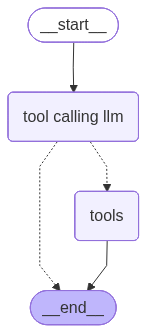

In [40]:
graph=builder.compile()
display(Image(graph.get_graph().draw_mermaid_png()))

In [41]:
messages=graph.invoke({'messages':[HumanMessage(content="1706.03762")]})
for m in messages['messages']:
    m.pretty_print()

================================ Human Message =================================

1706.03762
================================== Ai Message ==================================
Tool Calls:
  arxiv (rdtnb4cnj)
 Call ID: rdtnb4cnj
  Args:
    query: 1706.03762
================================= Tool Message =================================
Name: arxiv

Published: 2023-08-02
Title: Attention Is All You Need
Authors: Ashish Vaswani, Noam Shazeer, Niki Parmar, Jakob Uszkoreit, Llion Jones, Aidan N. Gomez, Lukasz Kaiser, Illia Polosukhin
Summary: The dominant sequence transduction models are based on complex recurrent or convolutional neural networks in an encoder-decoder configuration. The best performing models also connect the encoder and decoder through an attention mechanism. We propose a new simple network architecture, the Transformer, base


In [42]:
os.environ['LANGSMITH_API_KEY']=os.getenv('LANGSMITH_API_KEY')

In [43]:
os.environ["LANGCHAIN_TRACKING_V2"]='true'
os.environ['LANGCHAIN_PROJECT']='reACT project'

In [48]:
def multiply(a:int,b:int)->int:
    """multiply two numbers provided"""
    return a*b

def add(a:int,b:int)->int:
    """ add two numbers provided"""
    return a+b

def divide(a:int,b:int)->float:
    """divide two numbers provided"""
    return a/b

In [49]:
tools=[arxiv,wiki,tavily,add,multiply,divide]

In [50]:
llm_with_tools=llm.bind_tools(tools)

In [53]:
def tool_calling_llm(state:state):
    return {"messages":[llm_with_tools.invoke(state["messages"])]}

builder=StateGraph(state)
builder.add_node("tool calling llm",tool_calling_llm)
builder.add_node("tools",ToolNode(tools))
builder.add_edge(START,"tool calling llm")
builder.add_conditional_edges("tool calling llm",tools_condition)
builder.add_edge("tools","tool calling llm")
builder.add_edge("tool calling llm",END)

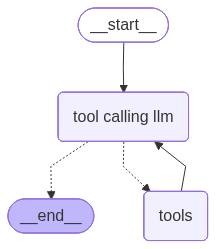

In [54]:
graph=builder.compile()
display(Image(graph.get_graph().draw_mermaid_png()))

In [56]:
messages=graph.invoke({'messages':[HumanMessage(content="add 5 and 5 and then multiply it with 5 and then divide it with 5")]})
for m in messages['messages']:
    m.pretty_print()

================================ Human Message =================================

add 5 and 5 and then multiply it with 5 and then divide it with 5
================================== Ai Message ==================================
Tool Calls:
  add (71bm2mgxq)
 Call ID: 71bm2mgxq
  Args:
    a: 5
    b: 5
  multiply (engvqaf50)
 Call ID: engvqaf50
  Args:
    a: 10
    b: 5
  divide (zjsck4kw2)
 Call ID: zjsck4kw2
  Args:
    a: 50
    b: 5
================================= Tool Message =================================
Name: add

10
================================= Tool Message =================================
Name: multiply

50
================================= Tool Message =================================
Name: divide

10.0
================================== Ai Message ==================================

The result of the operations is 10, then 50, and finally 10.0.


In [57]:
from langgraph.checkpoint.memory import MemorySaver

In [58]:
memory=MemorySaver()

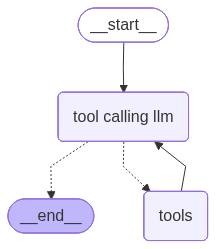

In [59]:
graph=builder.compile(checkpointer=memory)
display(Image(graph.get_graph().draw_mermaid_png()))

In [61]:
config={"configurable":{"thread_id":"1"}}
messages=graph.invoke({'messages':[HumanMessage(content="add 3 and 4")]},config=config)
for m in messages['messages']:
    m.pretty_print()

================================ Human Message =================================

add 3 and 4
================================== Ai Message ==================================
Tool Calls:
  add (8vnzetb3z)
 Call ID: 8vnzetb3z
  Args:
    a: 3
    b: 4
================================= Tool Message =================================
Name: add

7
================================== Ai Message ==================================

The result of the function call is 7.


In [62]:
messages=graph.invoke({'messages':[HumanMessage(content="multiply that number with 12")]},config=config)
for m in messages['messages']:
    m.pretty_print()

================================ Human Message =================================

add 3 and 4
================================== Ai Message ==================================
Tool Calls:
  add (8vnzetb3z)
 Call ID: 8vnzetb3z
  Args:
    a: 3
    b: 4
================================= Tool Message =================================
Name: add

7
================================== Ai Message ==================================

The result of the function call is 7.
================================ Human Message =================================

multiply that number with 12
================================== Ai Message ==================================
Tool Calls:
  multiply (km5b73g0r)
 Call ID: km5b73g0r
  Args:
    a: 7
    b: 12
================================= Tool Message =================================
Name: multiply

84
================================== Ai Message ==================================

The result of the function call is 84.


In [63]:
for chunk in graph.stream({'messages':'hi my name is 123 and i like cricket'},config,stream_mode='updates'):
    print(chunk)

{'tool calling llm': {'messages': [AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'df9hrjqnw', 'function': {'arguments': '{"query":"123 (number)"}', 'name': 'wikipedia'}, 'type': 'function'}, {'id': '70k4wapjk', 'function': {'arguments': '{"query":"Cricket (sport)"}', 'name': 'wikipedia'}, 'type': 'function'}]}, response_metadata={'token_usage': {'completion_tokens': 32, 'prompt_tokens': 827, 'total_tokens': 859, 'completion_time': 0.04209267, 'completion_tokens_details': None, 'prompt_time': 0.050074535, 'prompt_tokens_details': None, 'queue_time': 0.04541806, 'total_time': 0.092167205}, 'model_name': 'llama-3.1-8b-instant', 'system_fingerprint': 'fp_f757f4b0bf', 'service_tier': 'on_demand', 'finish_reason': 'tool_calls', 'logprobs': None, 'model_provider': 'groq'}, id='lc_run--019c72d6-b5ee-7ad2-9a8e-311007ecf8c1-0', tool_calls=[{'name': 'wikipedia', 'args': {'query': '123 (number)'}, 'id': 'df9hrjqnw', 'type': 'tool_call'}, {'name': 'wikipedia', 'args': {'query': 'Cr

c:\Users\kumar\Desktop\anaco\envs\langgraph\Lib\site-packages\wikipedia\wikipedia.py:389: GuessedAtParserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("html.parser"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 389 of the file c:\Users\kumar\Desktop\anaco\envs\langgraph\Lib\site-packages\wikipedia\wikipedia.py. To get rid of this warning, pass the additional argument 'features="html.parser"' to the BeautifulSoup constructor.

  lis = BeautifulSoup(html).find_all('li')


{'tools': {'messages': [ToolMessage(content='Page: 123 (number)\nSummary: 123 (one hundred [and] twenty-three) is the natural number following 122 and preceding 124.', name='wikipedia', id='8d8b98e1-a398-4f03-9eba-5e032be95245', tool_call_id='df9hrjqnw'), ToolMessage(content="Page: Cricket\nSummary: Cricket is a bat-and-ball game that is played between two teams of eleven players on a field, at the centre of which is a 22-yard (20-metre; 66-foot) pitch with a wicket at each end, each comprising two bails (small sticks) balanced on three stumps. Two players from the batting team, the striker and nonstriker, stand in front of either wicket holding bats, while one player from the fielding team, the bowler, bowls the ball toward the striker's wicket from the opposite end ", name='wikipedia', id='4266179b-a0c9-4987-b030-4c14d9e29af0', tool_call_id='70k4wapjk')]}}
{'tool calling llm': {'messages': [AIMessage(content="Here's a summary of the information about the number 123 and the sport of c